In [1]:
import pyemma
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
pdb = '../../../15Feb2022/300K/WT_ZAFF.pdb' #Topology PDB
traj = '../../../15Feb2022/300K/apo_300K_per100ps_tr1.nc' #All trajectories of apo-p53 at 300 K (LowTemp-Dataset-I)

In [3]:
distance_feat = pyemma.coordinates.featurizer(pdb)
distance_feat.add_distances(np.array([[1210,1786],[1210,1814],[1234,1800],[1234,1814],[1258,1814],[1276,1814],[1316,1786],[1316,1800],[1316,1814],[1331,1814],[1456,1786],[1456,1800],[1470,1786],[1470,1800],[1493,1814],[1814,2294]]),periodic=True)
print("Total number of distance features:", distance_feat.dimension())
parent_pairdist = pd.DataFrame(distance_feat.describe())
distance_feat

Total number of distance features: 16


MDFeaturizer with features:
['DIST: ARG 79 CA 1210 0 - ASN 115 CA 1786 0',
 'DIST: ARG 79 CA 1210 0 - PHE 117 CA 1814 0',
 'DIST: ARG 80 CA 1234 0 - THR 116 CA 1800 0',
 'DIST: ARG 80 CA 1234 0 - PHE 117 CA 1814 0',
 'DIST: CY2 81 CA 1258 0 - PHE 117 CA 1814 0',
 'DIST: PRO 82 CA 1276 0 - PHE 117 CA 1814 0',
 'DIST: GLU 85 CA 1316 0 - ASN 115 CA 1786 0',
 'DIST: GLU 85 CA 1316 0 - THR 116 CA 1800 0',
 'DIST: GLU 85 CA 1316 0 - PHE 117 CA 1814 0',
 'DIST: ARG 86 CA 1331 0 - PHE 117 CA 1814 0', ...]

In [4]:
distance_data1=pyemma.coordinates.load(traj,features=distance_feat)

In [5]:
tica1 = pyemma.coordinates.tica(distance_data1,lag=20)
tica1_output = tica1.get_output()
tica1_concatenated = np.concatenate(tica1_output)
tica1_df = pd.DataFrame(tica1_concatenated)
tica1_nos = tica1_df.shape[1]
print("First cycle no. of tICs", tica1_nos)

First cycle no. of tICs 13


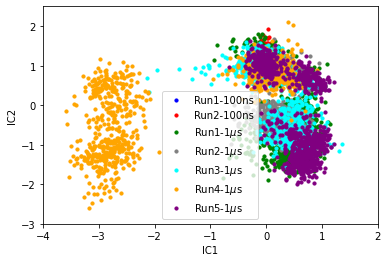

In [6]:
plt.scatter(tica1_concatenated[0:999:10,0], tica1_concatenated[0:999:10,1],c ="blue", s=10, label="Run1-100ns")
plt.scatter(tica1_concatenated[1000:1999:10,0], tica1_concatenated[1000:1999:10,1],c ="red", s=10, label="Run2-100ns")
plt.scatter(tica1_concatenated[2000:12090:10,0], tica1_concatenated[2000:12090:10,1],c ="green", s=10, label="Run1-1$\mu$s")
plt.scatter(tica1_concatenated[12091:22098:10,0], tica1_concatenated[12091:22098:10,1],c ="gray", s=10, label="Run2-1$\mu$s")
plt.scatter(tica1_concatenated[22099:32145:10,0], tica1_concatenated[22099:32145:10,1],c ="cyan", s=10, label="Run3-1$\mu$s")
plt.scatter(tica1_concatenated[32146:42164:10,0], tica1_concatenated[32146:42164:10,1],c ="orange", s=10, label="Run4-1$\mu$s")
plt.scatter(tica1_concatenated[42164:52272:10,0], tica1_concatenated[42164:52272:10,1],c ="purple", s=10, label="Run5-1$\mu$s")
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.xlim(-4,2)
plt.ylim(-3,2.5)
plt.legend()


#short run1: 1 to 1000 (1000)

#short run1: 1001 to 2000 (1000)

#mic run1: 2001 to 12091 (10090)

#mic run2: 12092 to 22099 (10007)

#mic run3: 22100 to 32146 (10046)

#mic run4: 32147 to 42165 (10018)

#mic run5: 42165 to 52272 (10111)


In [7]:
dist1 = pd.read_csv("./Turn_Nter_300K_apo.dist") #Distance between N-terminal and S6/7 turn

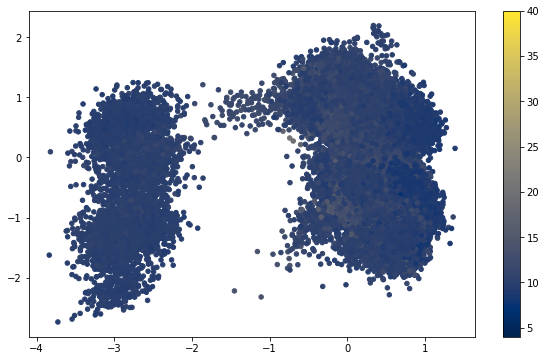

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:52272:,0]
y = tica1_concatenated[0:52272:,1]
gb_ene = dist1["d1"]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('cividis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 20,
           c = z)
v = np.arange(0, 40, 4)
#cbar = plt.colorbar(ticks=v)
#cbar.set_ticks(v)
#cbar.set_ticklabels(v)
plt.clim(4,40)
plt.colorbar(sc)
plt.show()
#plt.savefig("Turn_S6_7_Dist_300K.png", dpi = 300)

In [11]:
sasa_ILE = pd.read_csv("./I254_300K.sasa")
sasa_SER1 = pd.read_csv("./S215_300K.sasa")
sasa_SER2 = pd.read_csv("./S269_300K.sasa")

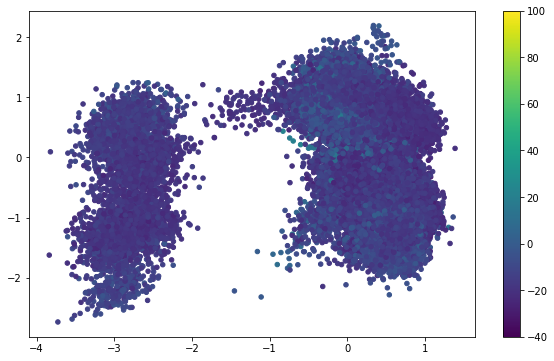

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:52272:,0]
y = tica1_concatenated[0:52272:,1]
gb_ene = sasa_SER1["SA_00003"]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 20,
           c = z)
plt.clim(-40,100)
plt.colorbar(sc)
plt.show()
#plt.savefig("Apo_S215_300K.png", dpi = 300)

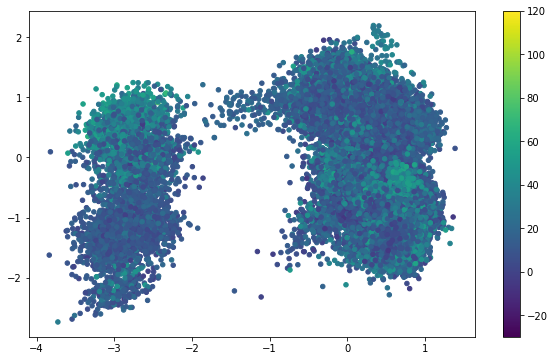

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:52272:,0]
y = tica1_concatenated[0:52272:,1]
gb_ene = sasa_SER2["SA_00006"]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 20,
           c = z)
plt.clim(-30,120)
plt.colorbar(sc)
plt.show()
#plt.savefig("Apo_S269_300K.png", dpi = 300)

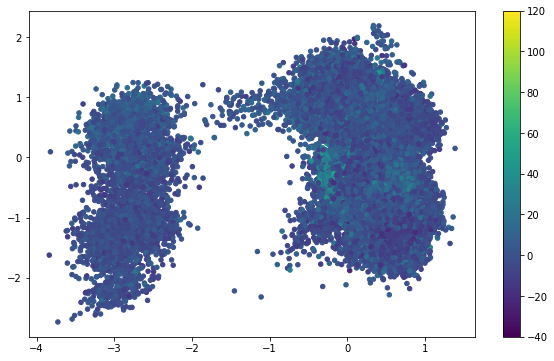

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:52272:,0]
y = tica1_concatenated[0:52272:,1]
gb_ene = sasa_ILE["SA_00001"]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 20,
           c = z)
plt.clim(-40,120)
plt.colorbar(sc)
plt.show()
#plt.savefig("Apo_I254_300K.png", dpi = 300)

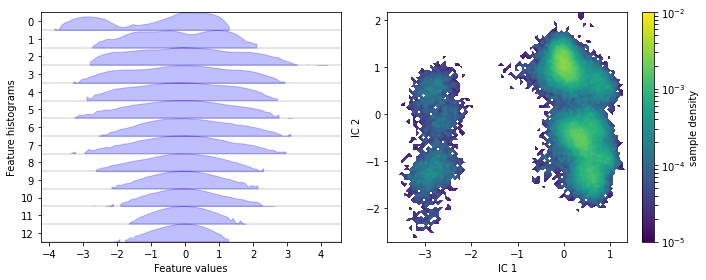

In [15]:
import pyemma.plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica1_concatenated,
    ax=axes[0],
    #feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
    ylog=True)
pyemma.plots.plot_density(*tica1_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure1.png", dpi=300)

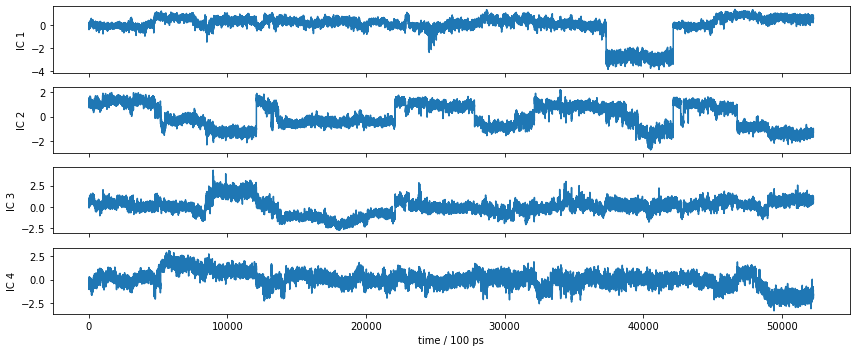

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 1 * np.arange(tica1_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica1_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / 100 ps')
fig.tight_layout()
#plt.savefig("Figure2.png", dpi=300)

In [17]:
cluster = pyemma.coordinates.cluster_kmeans(tica1_output, k=100, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

100%|██████████| 100/100 [00:00<00:00, 238.72it/s]                            

100%|██████████| 50/50 [00:00<00:00, 86.12it/s]                   


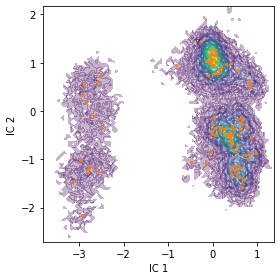

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(*tica1_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure3.png", dpi=300)

100%|██████████| 8/8 [00:02<00:00,  3.76it/s]                        


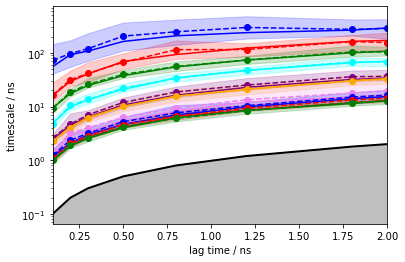

In [34]:
its = pyemma.msm.its(cluster.dtrajs, lags=20, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
plt.savefig("/media/shruti/3TB/p53/JCIM_Revision/Documents/Revision_2/Revised_FigureS3_A.png", dpi=300)

In [35]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=20, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

2368it [00:00, 12241.07it/s]                                                                                                          
100%|██████████| 100/100 [00:00<00:00, 214.76it/s]                                                                  

fraction of states used = 1.00
fraction of counts used = 1.00


100%|██████████| 19/19 [00:12<00:00,  1.51it/s]                        


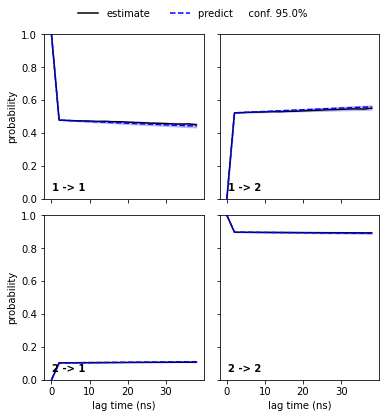

In [36]:
nstates = 2
cktest = msm.cktest(nstates, mlags=20)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
#plt.savefig("Figure5.png", dpi=300)

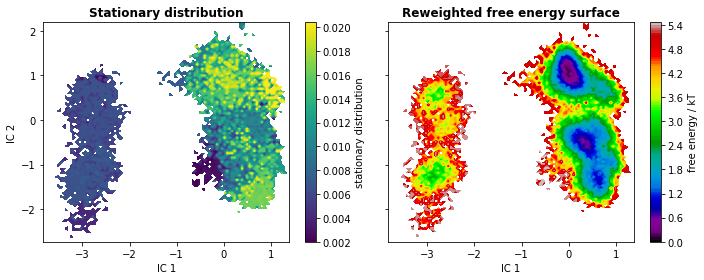

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica1_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica1_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
#plt.savefig("Figure6.png", dpi=300)

The first eigenvector is one: True (min=0.9999999999998932, max=1.0000000000000915)


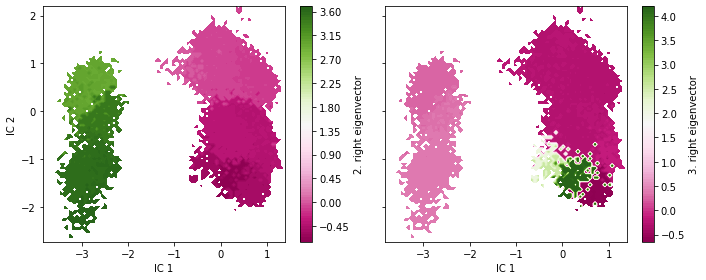

In [39]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica1_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure7.png", dpi=300)

In [40]:
msm.pcca(nstates)

PCCA(P=array([[0.09259, 0.     , ..., 0.     , 0.     ],
       [0.     , 0.25153, ..., 0.     , 0.01479],
       ...,
       [0.     , 0.     , ..., 0.39241, 0.00747],
       [0.     , 0.01206, ..., 0.00157, 0.31175]]),
   m=2)

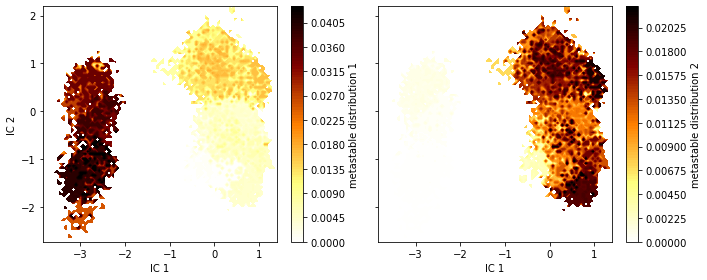

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica1_concatenated[:,:2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure8.png", dpi=300)

(-3.0, 2.5)

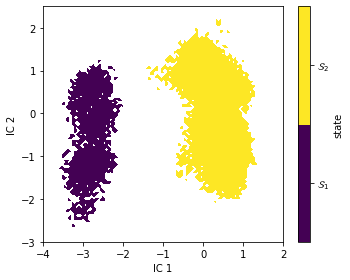

In [42]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica1_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
plt.xlim(-4,2)
plt.ylim(-3,2.5)
#plt.savefig("Figure9.png", dpi=300)

In [43]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 50)
distance_source = pyemma.coordinates.source(traj, features=distance_feat)
pyemma.coordinates.save_trajs(
    distance_source,
    pcca_samples,
    outfiles=['./pcca_LowTemp_DatasetI_State_{}_50_samples.pdb'.format(n + 1)
              for n in range(msm.n_metastable)])

/home/shruti/miniconda3/lib/python3.7/site-packages/mdtraj/core/trajectory.py:1888: RuntimeWarning: invalid value encountered in less
  if self.unitcell_lengths is not None and np.any(self.unitcell_lengths < 0):
/home/shruti/miniconda3/lib/python3.7/site-packages/mdtraj/core/trajectory.py:1891: RuntimeWarning: invalid value encountered in less
  if self.unitcell_angles is not None and np.any(self.unitcell_angles < 0):


['./pcca_LowTemp_DatasetI_State_1_50_samples.pdb',
 './pcca_LowTemp_DatasetI_State_2_50_samples.pdb']

In [44]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.077389	2.558915
2	0.922611	0.080547


In [47]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
print('The given value should be multiplied by 100 to get the MFPT in ps')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:
The given value should be multiplied by 100 to get the MFPT in ps


,1,2
1,0.00,295.07
2,3525.46,0.00


In [48]:
print('The given value should be multiplied by 100 to get the MFPT in ps')
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

The given value should be multiplied by 100 to get the MFPT in ps
MFPT 1 -> other: ( 352.5 ±  91.1) ns
MFPT other -> 1: (3826.3 ± 941.9) ns


In [31]:
start, final = 0, 1
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

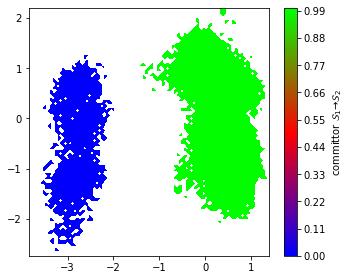

In [32]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica1_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap='brg',
    ax=ax,
    mask=True,
    cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (
        start + 1, final + 1))
fig.tight_layout()
plt.show()
#plt.savefig("Figure10.png", dpi=300)